In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts import table, utils, eval, check_claim_structure as cs
from scripts.similarity import Similarity

experiments_path = os.path.abspath(os.path.expandvars("$GITHUB_HOME/claim-extraction/experiments"))

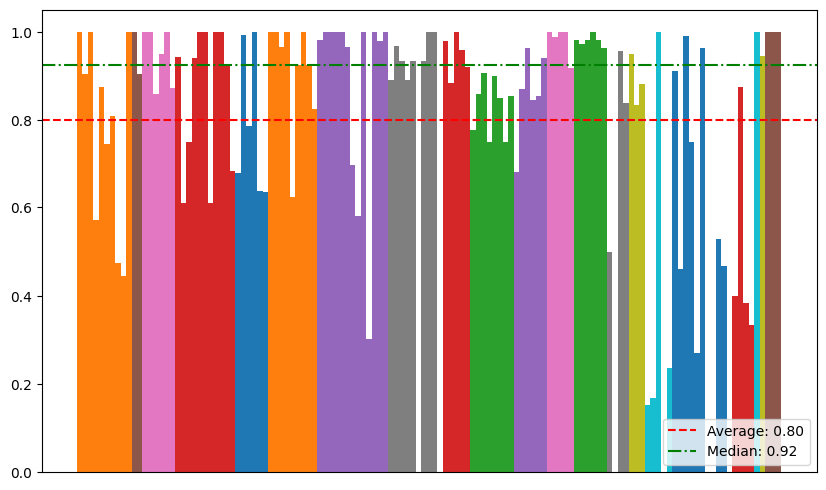

Percentage of corrected extracted claims: 0.9604800331057314


In [2]:
test_index = 1

tables_file_path = os.path.join(experiments_path, 'extracted_tables/CS_Dataset_Small.json')
dataset_path = os.path.join(experiments_path, 'output/cs_dataset_small', str(test_index))

d_results = eval.evaluate_extracted_articles(tables_file_path, dataset_path, False)

utils.plot_grouped_bars(d_results)

correct_claims_prc, ovr_prc = eval.wrong_claims_prc(dataset_path)

print(f"Percentage of corrected extracted claims: {ovr_prc}")